In [26]:
import pandas as pd

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [27]:
data=pd.read_csv("/workspaces/Gemstone_price_prediction/data/cubic_zirconia.csv")

In [28]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [29]:
data["color"].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [30]:
data.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
17590,17591,0.36,Premium,D,VS2,61.0,59.0,4.57,4.61,2.80,852
19784,19785,0.31,Ideal,F,VVS2,61.7,55.0,4.33,4.36,2.68,700
1445,1446,0.35,Ideal,I,IF,61.5,55.0,4.53,4.57,2.80,715
9798,9799,0.62,Premium,F,SI1,61.7,59.0,5.51,5.48,3.39,1595
12276,12277,0.60,Very Good,F,SI1,60.3,59.0,5.42,5.50,3.29,1670
21748,21749,0.31,Ideal,H,VVS2,62.4,57.0,4.32,4.36,2.71,625
18582,18583,0.78,Good,H,VS2,63.7,60.0,5.77,5.73,3.66,2440
16137,16138,0.76,Ideal,I,VS2,61.8,58.0,5.84,5.87,3.62,2551
109,110,0.41,Very Good,H,VVS2,62.0,56.0,4.77,4.81,2.97,873
6019,6020,1.01,Ideal,J,SI2,61.6,55.0,6.45,6.50,3.99,3732


In [31]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [32]:
data.size

296637

In [33]:
data.shape

(26967, 11)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [35]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [36]:
data.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [37]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [38]:
data.duplicated().sum()

34

In [39]:
data = data.drop_duplicates()

In [40]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [42]:
cat_columns=data.columns[data.dtypes=="object"]

In [43]:
num_columns=data.columns[data.dtypes!="object"]

In [44]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [45]:
data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [46]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"here is the total count:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64
here is the total count:5
color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64
here is the total count:7
clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64
here is the total count:8


In [47]:
data[num_columns]

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


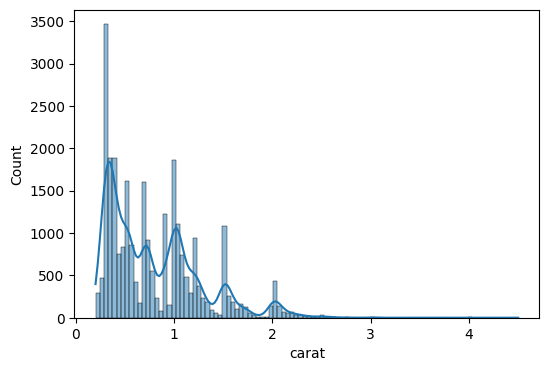

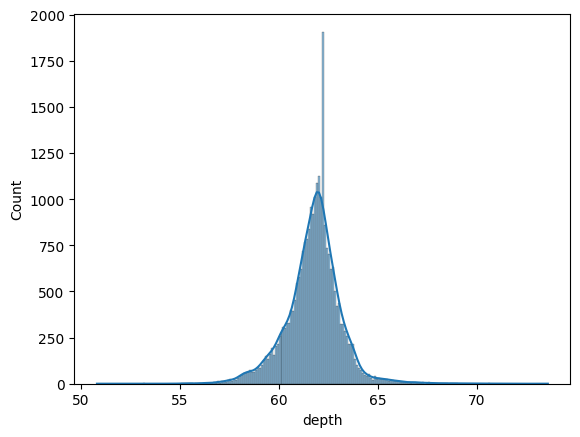

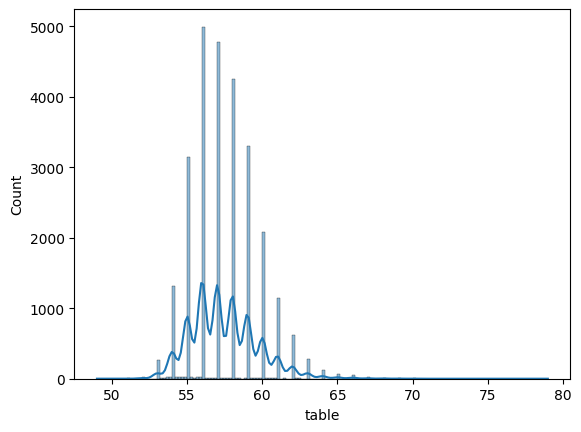

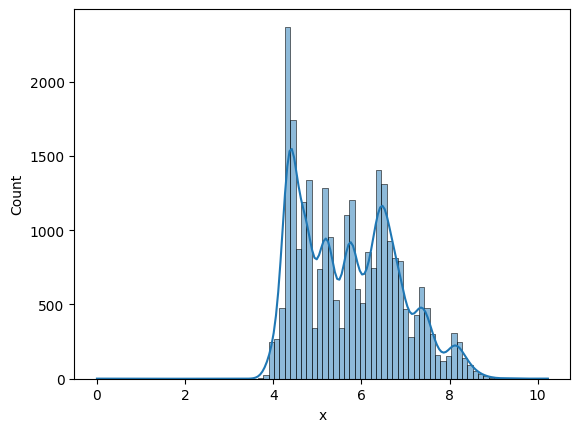

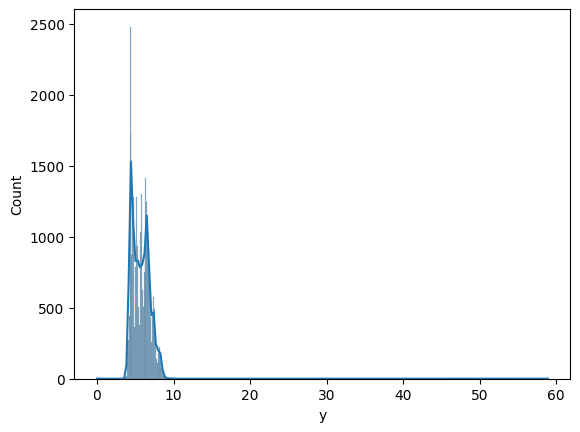

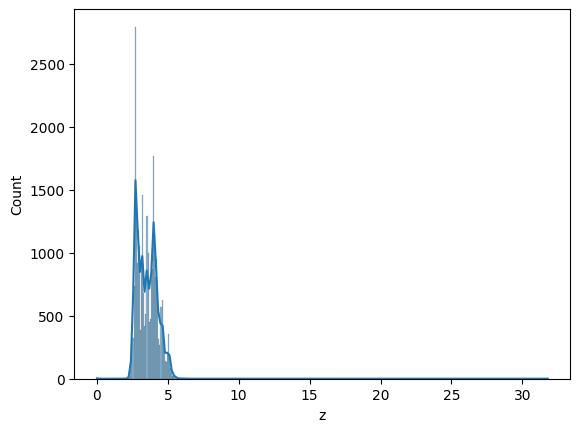

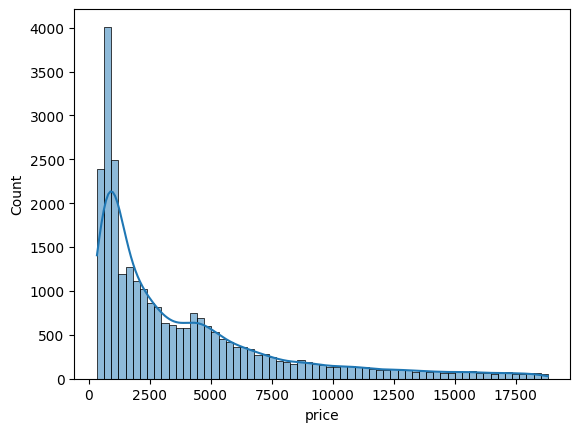

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

<Axes: >

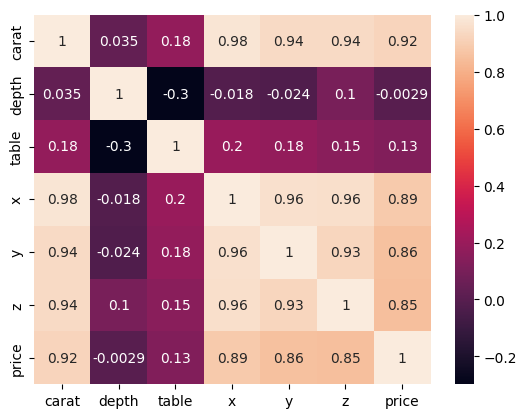

In [49]:
sns.heatmap(data[num_columns].corr(),annot=True)

In [50]:
data[cat_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [51]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [52]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

/tmp/ipykernel_10557/1684515325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cut"]=data["cut"].map(cut_map)
/tmp/ipykernel_10557/1684515325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clarity"]=data["clarity"].map(clarity_map)
/tmp/ipykernel_10557/1684515325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [53]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,61.8,56.0,4.19,4.20,2.60,682


In [54]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/fsdsmendtoend/main/notebooks/data/gemstone.csv")

HTTPError: HTTP Error 404: Not Found

In [ ]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [ ]:
X=data.drop(labels=["id","price"],axis=1)
y=data["price"]

In [ ]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [ ]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
dtypes: float64(6), object(3)
memory usage: 13.3+ MB


In [ ]:
X.select_dtypes(include="object")

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [ ]:
X.select_dtypes(exclude="object")

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [ ]:
cat_cols=X.select_dtypes(include="object").columns

num_cols=X.select_dtypes(exclude="object").columns

In [ ]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [ ]:
X.select_dtypes(include="object").head()

In [ ]:
X["clarity"].value_counts()

In [ ]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [ ]:
num_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [ ]:
cat_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))

    ]
)

In [ ]:
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [ ]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
preprocessor=ColumnTransformer(

    [
        ("num_pipeline",num_pipeline,num_cols),
        ("cat_pipeline",cat_pipeline,cat_cols)
    ]
)

In [ ]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [ ]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30, random_state=42)

In [ ]:
X_test.shape

(58072, 9)

In [ ]:
y_train.head()

11504      1181
95284      7418
184777    12755
5419       1020
45466       445
Name: price, dtype: int64

In [ ]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [ ]:
preprocessor.transform(X_test)

array([[-0.62907669,  0.25822979, -0.12063049, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60537405, -2.14801405, -0.12063049, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1250258 , -1.22253565,  0.92190185, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82314374, -0.01941373, -0.64189666, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.90189666, -0.66724861,  1.44316802, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.47063656,  0.90606467, -0.64189666, ...,  2.        ,
         1.        ,  3.        ]])

In [ ]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [ ]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,1.0,2.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,2.0,2.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,3.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,6.0


In [ ]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,0.0,2.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,3.0,1.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,1.0,6.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,5.0,6.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
58067,0.255007,0.535873,0.921902,0.416340,0.369414,0.425874,2.0,5.0,1.0
58068,-0.607514,0.535873,-0.641897,-0.528495,-0.554351,-0.499920,4.0,0.0,3.0
58069,-0.823144,-0.019414,-0.641897,-0.834441,-0.862273,-0.847093,4.0,3.0,6.0
58070,0.901897,-0.667249,1.443168,1.046230,0.967145,0.932167,3.0,5.0,2.0


# model training

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 7.3 MB/s eta 0:00:00:00:0100:01


In [ ]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor(),
    'xgboost':XGBRegressor()

}

In [ ]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [ ]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost']

In [ ]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'Randomforest', 'xgboost'])

In [ ]:
list(models.values())[1]

Lasso()

In [ ]:
def evaluate_model(true,pred):
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)

    return mae, mse,r2

In [ ]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make_prediction
    y_pred=model.predict(X_test)

    #this is for the validaiton
    MAE,MSE,R2=evaluate_model(y_test,y_pred)


    print("model training performance",model)
    print("MSE:", MSE)
    print("MAE:",MAE)
    print("R2 SCORE:",R2)

    r2_list.append(R2)

    print("="*40)
    print("\n")

    

    

model training performance
MSE: 1029473.3531156892
MAE: 675.075827006745
R2 SCORE: 0.9362906819996045


model training performance
MSE: 1029534.1175907081
MAE: 676.3788803086727
R2 SCORE: 0.9362869215688461


model training performance
MSE: 1029482.8329815734
MAE: 675.1087261318775
R2 SCORE: 0.9362900953347935


model training performance
MSE: 2291130.057094769
MAE: 1051.172228186302
R2 SCORE: 0.8582126162411592


model training performance
MSE: 374295.40284731047
MAE: 310.0230027616238
R2 SCORE: 0.9768365982723929


model training performance
MSE: 345616.14680618217
MAE: 297.25052956080435
R2 SCORE: 0.9786114240487077




In [ ]:
r2_list

[0.9362906819996045,
 0.9362869215688461,
 0.9362900953347935,
 0.8582126162411592,
 0.9768365982723929,
 0.9786114240487077]

In [ ]:
max(r2_list)

0.9786114240487077

In [ ]:
import logging
import os
from datetime import datetime

In [ ]:
LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

log_path=os.path.join(os.getcwd(),"logs")

os.makedirs(log_path,exist_ok=True)

LOG_FILEPATH=os.path.join(log_path,LOG_FILE)


In [ ]:
LOG_FILEPATH

'/config/workspace/experiment/logs/01_10_2024_15_49_44.log'

In [ ]:
logging.basicConfig(level=logging.INFO, 
                    filename=LOG_FILEPATH,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"
                    
)


In [ ]:
logging.info("this is my test log")